<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_Wannier90Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install JARVIS-Tools

In [1]:

!pip install jarvis-tools

     |████████████████████████████████| 798kB 2.8MB/s 
     |████████████████████████████████| 296kB 14.0MB/s 


In [20]:
# Example: JVASP-5, TiO2
# Find more at: https://figshare.com/projects/JARVIS-DFT_Wannier_Tight-binding_Hamiltonians/82469 
url='https://ndownloader.figshare.com/files/23102543'
tag='JVASP-5.zip'
import zipfile, os, requests
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
#url, js_tag = datasets(dataset)
def get_zip_file(url='',tag=''):
  path = str(os.path.join(os.path.dirname('.'),tag )) #__file__
  if not  os.path.isfile(path):
      zfile = str(os.path.join(os.path.dirname('.'), tag))
      r = requests.get(url)
      f = open(zfile, "wb")
      f.write(r.content)
      f.close()

      with zipfile.ZipFile(zfile, 'r') as zipObj:
          #zipObj.extract(path)
          zipObj.extractall(os.path.join(os.path.dirname('.')))
      os.remove(zfile)

def band_diagram(eigs=[],labels=[], en_dos=[], dos=[],pdos=[]):
    fig = plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 22})
    the_grid = GridSpec(1, 2)
    plt.subplot(the_grid[0])
    plt.title('Bandstructure')
    for i, ii in enumerate(eigs):
        plt.plot(ii, color="b")
    
    if labels !=[]:
       kp_labels_points = []
       kp_labels = []
       for k,kk in enumerate(labels):
           if kk!='':
               kp_labels_points.append(k)
               kp_labels.append(kk)
       plt.xticks(kp_labels_points,kp_labels)
    plt.ylabel('Energy (E-E$_f$) (eV)')
    plt.xlim([0,eigs.shape[1]-1])
    plt.ylim([-4,4])
    #plt.axhline(y=0,linestyle='-.',c='g')
    
    plt.subplot(the_grid[1])
    #plt.axvline(y=0,linestyle='-.',c='g')
    plt.title('Density of states')
    plt.plot(en_dos,dos)
    plt.ylim(0,max(dos))
    plt.xlim([-4,4])
    plt.xlabel('Energy(eV)')
    plt.ylabel('DOS')
    plt.ylabel('Energy (eV)')
    
    
    plt.tight_layout()

    return plt


## Download necessary files from the JARVIS-Figshare repo

In [ ]:
get_zip_file(url=url,tag=tag)

## Solve Wannier tight-binding Hamiltonian

H size 7 7 9 48 48
DOS BAND GAP  1.7691132799645661      -0.052876536794119744   1.7162367431704464
np.sum(dos)  45.95886298083421
NWAN= 48


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

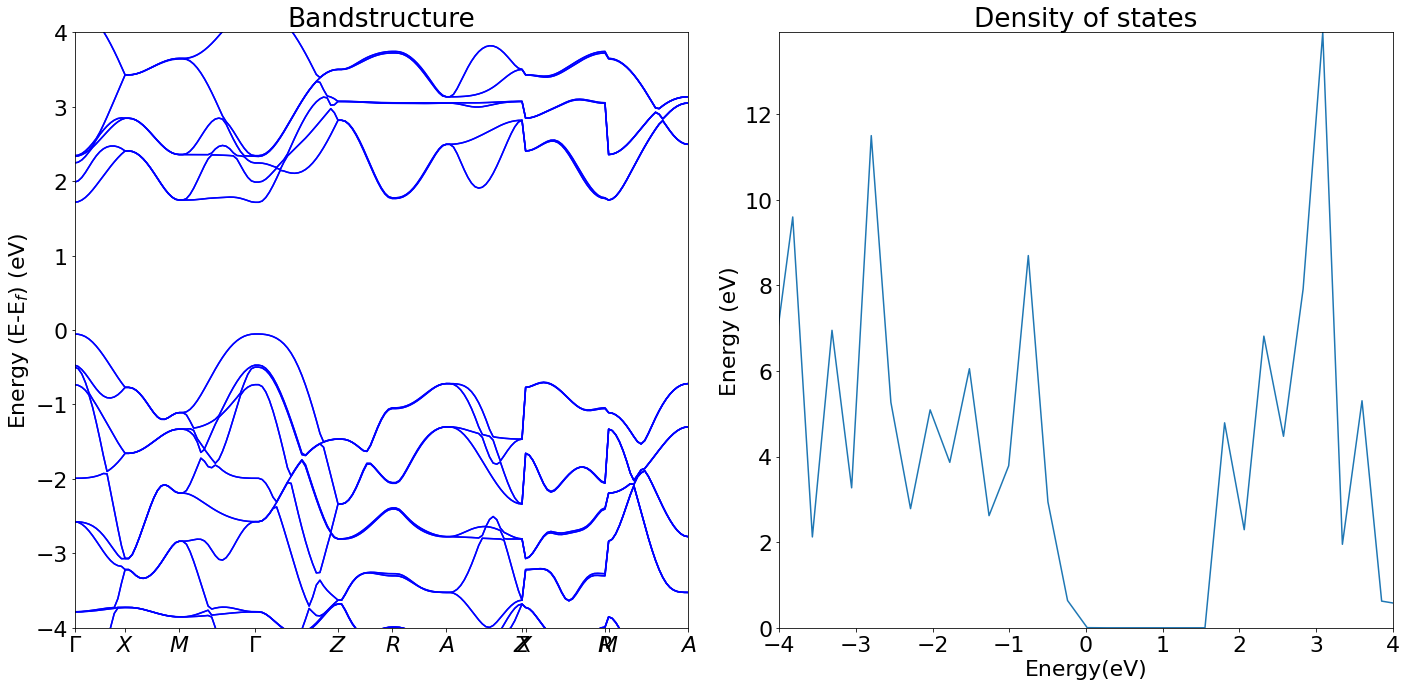

In [22]:
from jarvis.io.wannier.outputs import WannierHam
from jarvis.io.vasp.inputs import Kpoints
from jarvis.io.vasp.outputs import Outcar
kp = Kpoints(filename='KPOINTS.bands')
out = Outcar('OUTCAR')
efermi = 3.3559
kpts=kp.kpoints.kpts
labels=kp.kpoints.labels
w = WannierHam(filename='wannier90_hr.dat')
eigs = w.band_structure_eigs(kpath=kpts, efermi=efermi).T
en_dos, dos, pdos = w.dos(kpoints=kpts,efermi=efermi)
nwan=w.nwan
print ('NWAN=',nwan)
band_diagram(eigs=eigs,labels = labels, en_dos=en_dos, dos=dos,pdos=pdos)